In [1]:
import pandas as pd # Cargamos la libreria de "pandas" para la manipulación y el análisis de datos
import numpy as np # Cargamos la librería de "numpy" para realizar cálculos lógicos y matemáticos sobre cuadros y matrices en el caso que lo necesitemos
import pyarrow #Cargando la librería "json" nos permitira manipular archivos tipo parquet
import json #Cargando la librería "json" nos permitira manipular archivos tipo JSON
import re
import warnings
warnings.filterwarnings("ignore")
import re

### USER YELP

In [90]:
# Read the parquet file into a DataFrame
userdf = pd.read_parquet('0.user_yelp.parquet')
# Display the DaTaFrame
userdf

,user_id,user review count,avg user stars
0,rppTTi-kfF8-qyiArNemag,460,3.33
1,2Od6rQYNvPUXQC2Go7vIqg,986,3.63
2,BgZwJBhVWKq1Urs4rKBdiA,1545,3.51
3,FdZumOby8Mx4IkdhYVfyRQ,20,4.10
4,kLm3B6LeboEZWX_4otpILA,1670,3.65
...,...,...,...
31839,j1sRA3sCHLDDN9P2J1lGhw,20,3.15
31840,7tQqp2T-2zD04uE9UvCXIg,22,3.65
31841,oYll_Yz0j8aZVQuCSAElaQ,1,5.00
31842,t90vh4t8L7_OIUE9y69yLQ,1,1.00


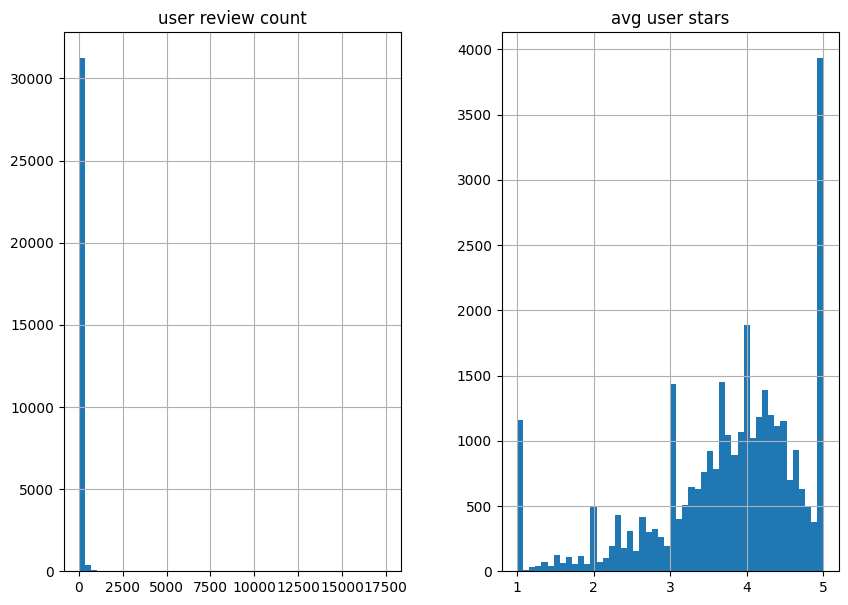

In [95]:
#Visualiza las distribuciones de las variables numéricas y categóricas.
# crear Histogramas para variables numéricas
import seaborn as sns
import matplotlib.pyplot as plt
userdf.hist(bins=50, figsize=(10,7))
plt.show()


In [22]:
# Estadísticas descriptivas User yelp
print(userdf.describe())


       user review count  avg user stars
count       31844.000000    31844.000000
mean           42.591446        3.763999
std           186.361089        0.979354
min             1.000000        1.000000
25%             4.000000        3.270000
50%            11.000000        3.960000
75%            31.000000        4.460000
max         17473.000000        5.000000


### BUSINESS YELP

In [123]:
%pip install sweetviz

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: sweetviz in c:\users\agustin\appdata\local\programs\python\python312\lib\site-packages (2.3.1)




[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [124]:
import pandas as pd
# Read the parquet file into a DataFrame
businessdf = pd.read_parquet('1.business_yelp.parquet')
# Display the DataFrame
businessdf

,business_id,name,city,state,latitude,longitude,stars business,restaurant review count,Lunes horarios,Martes horarios,Miércoles horarios,Jueves horarios,Viernes horarios,Sábado horarios,Domingo horarios
0,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,Florida,27.894167,-82.779866,3.0,19,0:0-0:0,10:45-22:0,10:45-22:0,10:45-22:0,10:45-22:0,10:45-22:0,10:45-22:0
1,XwoXi0M66RU6Gouq-DSDHw,G Peppers Grill & Tavern,Citrus Park,Florida,28.092136,-82.578574,4.0,82,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-23:0,11:0-23:0,10:30-21:0
2,uKEabBQrn0gLzvTppOrKIA,Casita Taqueria,Saint Petersburg,Florida,27.796976,-82.638168,4.5,207,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,None
3,L0-MS0MbQhEWAPLkjCqhpg,O'Shucks Seafood & Grill,Madeira Beach,Florida,27.785218,-82.782112,3.5,29,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0
4,3Kj0DlqXWTGqi6GUsM0Nfg,El Rancho Mexican Grill,Port Richey,Florida,28.286743,-82.715290,2.5,9,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,12:0-21:30,12:0-21:30,12:0-20:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,KjjizCh7mp7AjBwRZpi9EA,Tequila Mexican Restaurant And Grill,SD,Florida,28.032217,-82.367921,3.0,64,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0
708,0jETEp-kxQUA9nLTEuaZeQ,Carmelita's Mexican Restaurant,SD,Florida,27.819213,-82.753403,3.5,174,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0
709,c6RWw740cIB9-efs9tSLyg,Pinch a Taco,Tampa,Florida,27.892254,-82.493984,5.0,34,None,None,None,None,None,None,None
710,hezQG50YXqdgxkhl2R9OuQ,Taco Bell,Holiday Village,Florida,27.996400,-82.565400,1.5,30,8:0-1:0,8:0-1:0,8:0-1:0,8:0-1:0,8:0-2:0,8:0-2:0,8:0-1:0


In [125]:
import sweetviz as sv

report = sv.analyze(businessdf)

report.show_html('Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [105]:
#mostrar los valores unicos que tiene la columna stars bussines y que correspondan a name = Taco bell en el dataframe businessdf
businessdf[businessdf['name']=='Taco Bell']['stars business'].unique()


array([2.5, 2. , 3. , 1.5, 3.5, 1. ])

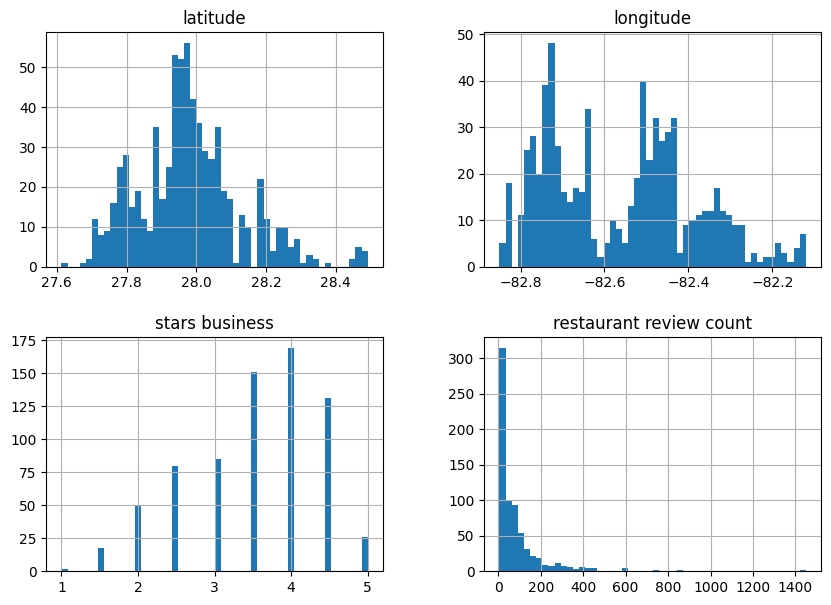

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
businessdf.hist(bins=50, figsize=(10,7))
plt.show()


In [32]:
#mostrar todos los name = taco bell junto con su stars business del dataframe businessdf
businessdf[businessdf['name'].str.contains('Taco Bell', flags=re.IGNORECASE, regex=True)]


,business_id,name,city,state,latitude,longitude,stars business,restaurant review count,Lunes horarios,Martes horarios,Miércoles horarios,Jueves horarios,Viernes horarios,Sábado horarios,Domingo horarios
5,H2nFgEFitRk7ltE8IRH0xA,Taco Bell,Tampa,Florida,27.944918,-82.523213,2.5,42,7:0-2:0,7:0-2:0,7:0-2:0,7:0-2:0,7:0-3:0,7:0-3:0,7:0-2:0
43,sMrUg8UgpvsV0qEzVScGpw,Taco Bell,New Port Richey,Florida,28.276969,-82.674113,2.0,21,10:30-23:0,10:30-23:0,10:30-23:0,10:30-23:0,10:30-23:0,10:0-0:0,10:0-23:0
52,dpGKdWz6y7ymYg3tpiPNDQ,Taco Bell,Tampa,Florida,27.963492,-82.401384,2.0,13,7:0-2:0,7:0-2:0,7:0-2:0,7:0-2:0,7:0-2:0,7:0-2:0,7:0-2:0
57,fXsdsGnTntaRWbfUxP3wXw,Taco Bell,Citrus Park,Florida,28.068941,-82.573700,3.0,5,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,11:0-17:0
68,IutQN-u-d_T4Ra0MMHKeIw,Taco Bell,Pinellas Park,Florida,27.839700,-82.695700,2.0,24,7:0-2:0,7:0-2:0,7:0-2:0,7:0-2:0,7:0-3:0,7:0-3:0,7:0-2:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,eHcaicXwRk58wUvsmlm_dg,Taco Bell,Clearwater,Florida,27.915779,-82.732501,2.0,24,8:0-1:0,8:0-1:0,8:0-1:0,8:0-1:0,8:0-1:0,8:0-1:0,8:0-1:0
702,Rt4KE1qP7czqcgnqLRspDg,Taco Bell,SD,Florida,27.761530,-82.735370,1.5,29,8:0-1:0,8:0-1:0,8:0-1:0,8:0-1:0,8:0-2:0,8:0-2:0,8:0-1:0
703,SMcCozP4wjNJ8hs7ZW5tnw,Taco Bell,SD,Florida,28.051555,-82.504049,3.0,25,9:0-21:0,9:0-21:0,9:0-21:0,9:0-21:0,9:0-21:0,9:0-21:0,9:0-21:0
705,y-B-ukhP-i4D6ZGwTl2jRg,Taco Bell,SD,Florida,28.009178,-82.504552,2.0,21,8:0-2:0,8:0-2:0,8:0-2:0,8:0-2:0,8:0-2:0,8:0-2:0,8:0-2:0


In [27]:
#mostrar el stars business promedio de los name = Taco Bell del dataframe businessdf YELP
businessdf[businessdf['name'] == 'Taco Bell']['stars business'].mean()

2.1666666666666665

In [23]:
# Estadísticas descriptivas buseiness yelp
print(businessdf.describe())

         latitude   longitude  stars business  restaurant review count
count  712.000000  712.000000      712.000000               712.000000
mean    27.980253  -82.560758        3.522472                98.827247
std      0.149751    0.174195        0.863089               164.349092
min     27.613073  -82.850205        1.000000                 5.000000
25%     27.893172  -82.728131        3.000000                18.750000
50%     27.966504  -82.541440        3.500000                45.000000
75%     28.054627  -82.441542        4.000000               105.250000
max     28.491650  -82.120078        5.000000              1449.000000


### REVIEWS YELP

In [38]:
# Read the parquet file into a DataFrame
reviewdf = pd.read_parquet('2.review_yelp.parquet')
# Display the DataFrame
reviewdf


,review_id,user_id,business_id,stars review,text,fecha review,hora entera review,dia review
0,cCs7yPSyk8NdA-Ufoz_7hw,FodM8aoGMQO2zsQCQxBTYQ,v5ktgWMAARaczTMh2rAJKg,2,The service here has gone down. We used to go ...,2017-12-27,2,Miércoles
1,8ZDUB-Y6JFxex541jHprGg,bIXslp2Sojhp9OcA-PNTvw,-zsvmEbkd-K9K2DAAKqiEQ,5,Thoroughly enjoyed our visit to Salty's this e...,2018-07-17,2,Martes
2,Naht5FrBGZDFGjwCQ-DyMw,QKoP7XabOXXWIkTwvYyCiA,xGUAa3xa8KsmbolC3XboQg,5,Xtreme Tacos has become one of my favorite pla...,2017-10-02,16,Lunes
3,Au_hzNqry6cPlnUGklB8QQ,lE5pLYWxkjhwwNywRc5q_Q,pjb3xGA9ccjl49B5ERH46w,1,Spent way too much money to get actually spoil...,2017-09-20,17,Miércoles
4,08zRc30-H07BsVo9LsIBeQ,xyFV6RJvioJWBLe6VRfqAA,-zsvmEbkd-K9K2DAAKqiEQ,5,"Live music, nice patio seating, large bar with...",2017-12-02,18,Sábado
...,...,...,...,...,...,...,...,...
46248,6iLfgKeFrzA2kbuXDOK9ng,j3X-vOFNaDsSq5rHNA984A,LgaPsosgAnyNst8X--xnIA,2,I tried to order a steak tostada and I was tol...,2021-12-07,18,Martes
46249,gGdC75nHWPsftA6Q_ooaDw,mNp-w-r2CVM7wPjP5UbPng,VVarKkODJTs_qx_gz4Hxbg,5,"In rating chain restaurants, one has to stay a...",2017-05-28,11,Domingo
46250,f9odrk0XCRtMsNL0kQZDYg,q4BwmLQ3GixSMl_3t-bAvw,Hywj7lDRT7x5V9l6fiAKpQ,5,Yum! I'm a west coat girl who loves her Authe...,2020-09-20,18,Domingo
46251,3UUN6-33ZLspm0K36hsD9A,ke_64n5NQD3UyFMHEIE9Bg,lrowppSl2sk3hU4tSUaS6Q,5,Amazing food and service! had the chicharrones...,2021-10-06,21,Miércoles


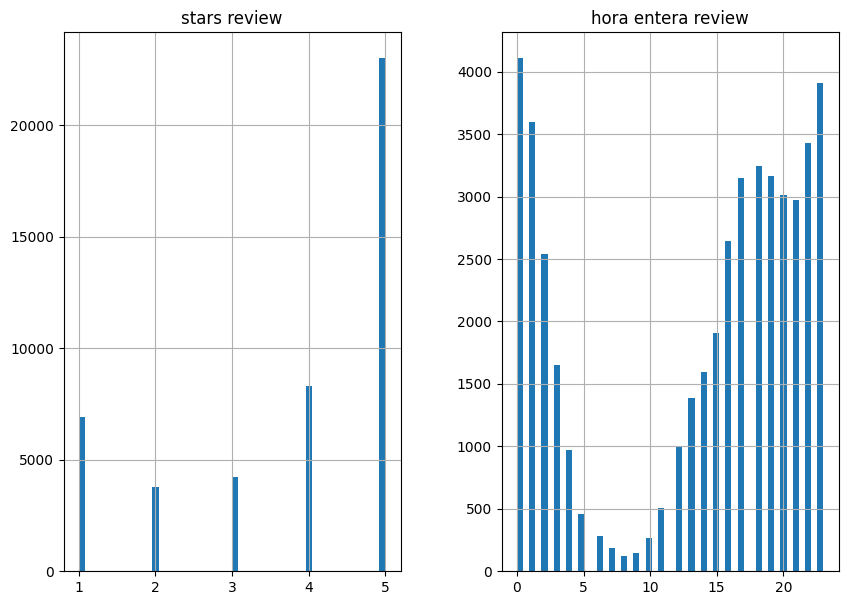

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
reviewdf.hist(bins=50, figsize=(10,7))
plt.show()

In [72]:
#tomar la fecha mas antigua y la mas reciente de la columna fecha review del dataframe reviewdf
print(reviewdf['fecha review'].min())
print(reviewdf['fecha review'].max())


2017-01-01
2021-12-30


In [24]:
# Estadísticas descriptivas review yelp
print(reviewdf.describe())

       stars review  hora entera review
count  46253.000000        46253.000000
mean       3.795602           13.334032
std        1.488748            8.192095
min        1.000000            0.000000
25%        3.000000            3.000000
50%        4.000000           16.000000
75%        5.000000           20.000000
max        5.000000           23.000000


In [88]:
#unir los dataframes businessdf y reviewdf por la columna business_id
business_review_yelp = pd.merge(businessdf, reviewdf, on='business_id')
business_review_yelp

,business_id,name,city,state,latitude,longitude,stars business,restaurant review count,Lunes horarios,Martes horarios,...,Viernes horarios,Sábado horarios,Domingo horarios,review_id,user_id,stars review,text,fecha review,hora entera review,dia review
0,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,Florida,27.894167,-82.779866,3.0,19,0:0-0:0,10:45-22:0,...,10:45-22:0,10:45-22:0,10:45-22:0,ZnBdH4Z-0GlRUzD48ddv-g,3a3af83Efpx6I921Zwuwbw,4,The New Chipotle Mexican Grill conveniently lo...,2017-08-30,10,Miércoles
1,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,Florida,27.894167,-82.779866,3.0,19,0:0-0:0,10:45-22:0,...,10:45-22:0,10:45-22:0,10:45-22:0,YzyXWkMWeXde9CdicTPPIA,3EzCBt-russ3KFSnd2NYjg,5,I am a chipotle enthusiast but from the first ...,2018-01-18,23,Jueves
2,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,Florida,27.894167,-82.779866,3.0,19,0:0-0:0,10:45-22:0,...,10:45-22:0,10:45-22:0,10:45-22:0,rJirivjBFagIEMKEdE41Qg,8esw4QJpuQ0FmRD2VDFT4w,5,Went into this location about an hour before t...,2018-09-08,1,Sábado
3,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,Florida,27.894167,-82.779866,3.0,19,0:0-0:0,10:45-22:0,...,10:45-22:0,10:45-22:0,10:45-22:0,YQhE9QP_RAijHp4wVBSXVw,kl_6g-H9FoyRoObZ4l9d_g,5,I come to this chipotle often and it's one of ...,2019-06-24,16,Lunes
4,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,Florida,27.894167,-82.779866,3.0,19,0:0-0:0,10:45-22:0,...,10:45-22:0,10:45-22:0,10:45-22:0,VAhU_DNMkJjDWwRcN1aPew,w7-qZOQ6V09Ap5276eDUww,2,"The food is good, as per usual at any Chipotle...",2018-06-20,11,Miércoles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46248,0a9Miij7BFmKm83Iqni5sA,Capital Tacos,Wesley Chapel,Florida,28.186629,-82.366184,4.0,754,0:0-0:0,11:0-21:0,...,11:0-21:0,11:0-21:0,11:0-20:0,KgiRWGdR0ENO-DhYnW1Y1w,zkQi7B9b-yFbF8k2XSnDHQ,3,Not to impressed by this place at all. Stoppa...,2017-03-06,1,Lunes
46249,0a9Miij7BFmKm83Iqni5sA,Capital Tacos,Wesley Chapel,Florida,28.186629,-82.366184,4.0,754,0:0-0:0,11:0-21:0,...,11:0-21:0,11:0-21:0,11:0-20:0,2-sJ7O29Dnw7Jq8UEpDrLQ,1MLraAQjSCVIUO1cyGMf-A,4,I used to go to the Land O Lakes location when...,2021-11-21,12,Domingo
46250,0a9Miij7BFmKm83Iqni5sA,Capital Tacos,Wesley Chapel,Florida,28.186629,-82.366184,4.0,754,0:0-0:0,11:0-21:0,...,11:0-21:0,11:0-21:0,11:0-20:0,aHOt83JofJGIrBFdufEYBg,rLXEF35rKNgkWpXvo4Ny8w,5,I've eaten here twice since they opened in the...,2019-02-23,0,Sábado
46251,0a9Miij7BFmKm83Iqni5sA,Capital Tacos,Wesley Chapel,Florida,28.186629,-82.366184,4.0,754,0:0-0:0,11:0-21:0,...,11:0-21:0,11:0-21:0,11:0-20:0,lNC7gZqowBnlaQrp4zj_Ug,gaYlBE5oYtiDPK4g45dg9A,5,Best tacos in the Tampa Bay Area hands down. ...,2020-10-08,14,Jueves


In [107]:
#mostrar los valores unicos que tiene la columna stars review y que correspondan a name = Taco bell en el dataframe businessdf
business_review_yelp[business_review_yelp['name']=='Taco Bell']['stars review'].unique()

#mostrar la cantidad que se repite cada valor de la columna stars review y que correspondan a name = Taco bell en el dataframe businessdf
business_review_yelp[business_review_yelp['name']=='Taco Bell']['stars review'].value_counts()


stars review
1    704
5    142
2     94
4     62
3     61
Name: count, dtype: int64

In [89]:
#hacer un promedio de las 'stars review' del name = Taco Bell del dataframe business_review
business_review_yelp[business_review_yelp['name'] == 'Taco Bell']['stars review'].mean()


1.9125117591721543

### REVIEWS GOOGLE

In [77]:
# Read the parquet file into a DataFrame - este google 
reviewsfloridadf = pd.read_parquet('3.Reviews_florida_google.parquet')
# Display the DataFrame
reviewsfloridadf


,user_id,user_name,rating,text,resp,gmap_id,business_name,category,city,State_review,date,hour,day
0,1.176490e+20,Jane Cook,5,any time we are in Pompano Beach we go for lun...,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2015-05-25,17,Monday
1,1.041909e+20,Mark Felix,4,Good service. Food was so so.,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2017-11-14,9,Tuesday
2,1.121549e+20,Yanio w Alfonso,1,Nasty place and very expensive.,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2018-08-19,6,Sunday
3,1.126933e+20,Carlos San Luis,5,Good mexican food,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2018-01-01,15,Monday
4,1.131080e+20,Maigra Hernandez,5,Tacos were great,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2018-03-04,15,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67320,1.134588e+20,Ade,1,None,No,0x88d9bf290ee132e7:0x771f3f6950e264db,Taco Bus Miami,Mexican restaurant,Miami,Florida,2020-04-01,3,Wednesday
67321,1.182218e+20,Ambar Escribano,5,None,No,0x88d9bf290ee132e7:0x771f3f6950e264db,Taco Bus Miami,Mexican restaurant,Miami,Florida,2021-03-31,20,Wednesday
67322,1.175239e+20,Johana Murillo,5,None,No,0x88d9bf290ee132e7:0x771f3f6950e264db,Taco Bus Miami,Mexican restaurant,Miami,Florida,2020-09-14,18,Monday
67323,1.045610e+20,Robert Angulo,5,None,No,0x88d9bf290ee132e7:0x771f3f6950e264db,Taco Bus Miami,Mexican restaurant,Miami,Florida,2020-09-28,6,Monday


In [78]:
#tomar la fecha mas antigua y la mas reciente de la columna date del dataframe reviewdf
print(reviewsfloridadf['date'].min())
print(reviewsfloridadf['date'].max())

2009-05-11
2021-08-30


In [110]:
import pandas as pd
from datetime import datetime

# Asegúrate de que la columna 'date' esté en formato datetime
reviewsfloridadf['date'] = pd.to_datetime(reviewsfloridadf['date'])

# Define la fecha de comparación como un objeto datetime
cutoff_date = datetime(2017, 1, 1)

# Filtra el DataFrame utilizando la fecha de comparación
reviewsfloridadf = reviewsfloridadf[reviewsfloridadf['date'] > cutoff_date]
reviewsfloridadf


,user_id,user_name,rating,text,resp,gmap_id,business_name,category,city,State_review,date,hour,day,avg_rating
1,1.041909e+20,Mark Felix,4,Good service. Food was so so.,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2017-11-14,9,Tuesday,3.6
2,1.121549e+20,Yanio w Alfonso,1,Nasty place and very expensive.,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2018-08-19,6,Sunday,3.6
3,1.126933e+20,Carlos San Luis,5,Good mexican food,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2018-01-01,15,Monday,3.6
4,1.131080e+20,Maigra Hernandez,5,Tacos were great,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2018-03-04,15,Sunday,3.6
5,1.035951e+20,Luis f “Dios es mi fortaleza” Zarate L,1,(Translated by Google) I do not like it for no...,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2018-02-05,6,Monday,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67320,1.134588e+20,Ade,1,None,No,0x88d9bf290ee132e7:0x771f3f6950e264db,Taco Bus Miami,Mexican restaurant,Miami,Florida,2020-04-01,3,Wednesday,4.4
67321,1.182218e+20,Ambar Escribano,5,None,No,0x88d9bf290ee132e7:0x771f3f6950e264db,Taco Bus Miami,Mexican restaurant,Miami,Florida,2021-03-31,20,Wednesday,4.4
67322,1.175239e+20,Johana Murillo,5,None,No,0x88d9bf290ee132e7:0x771f3f6950e264db,Taco Bus Miami,Mexican restaurant,Miami,Florida,2020-09-14,18,Monday,4.4
67323,1.045610e+20,Robert Angulo,5,None,No,0x88d9bf290ee132e7:0x771f3f6950e264db,Taco Bus Miami,Mexican restaurant,Miami,Florida,2020-09-28,6,Monday,4.4


In [111]:
#tomar la fecha mas antigua y la mas reciente de la columna date del dataframe reviewdf
print(reviewsfloridadf['date'].min())
print(reviewsfloridadf['date'].max())

2017-01-02 00:00:00
2021-08-30 00:00:00


In [81]:
# Estadísticas descriptivas review google
print(reviewsfloridadf.describe())

            user_id        rating                           date          hour
count  6.432600e+04  64326.000000                          64326  64326.000000
mean   1.092375e+20      4.231026  2019-06-04 22:44:06.693405696     14.235985
min    1.000002e+20      1.000000            2017-01-02 00:00:00      0.000000
25%    1.046304e+20      4.000000            2018-07-30 00:00:00     10.000000
50%    1.092522e+20      5.000000            2019-05-26 00:00:00     15.000000
75%    1.138243e+20      5.000000            2020-02-29 00:00:00     19.000000
max    1.184467e+20      5.000000            2021-08-30 00:00:00     23.000000
std    5.320081e+18      1.140511                            NaN      5.549550


In [112]:
#mostrar el rating promedio de reseñas de los business_name = Taco Bell del dataframe reviewsfloridadf
reviewsfloridadf[reviewsfloridadf['business_name'] == 'Taco Bell']['rating'].mean()


3.798736206733943

In [113]:
#agregar una columna al dataframe reviewsfloridadf que llame 'avg_rating' y que contenga el promedio de los valores de la columna 'rating' para cada 'business_name' unico, 'city' unico y 'gmap_id' unico. El rating debe ser un numero con un decimal
reviewsfloridadf['avg_rating'] = reviewsfloridadf.groupby(['business_name', 'city', 'gmap_id'])['rating'].transform('mean')
reviewsfloridadf['avg_rating'] = reviewsfloridadf['avg_rating'].round(1)
reviewsfloridadf

,user_id,user_name,rating,text,resp,gmap_id,business_name,category,city,State_review,date,hour,day,avg_rating
1,1.041909e+20,Mark Felix,4,Good service. Food was so so.,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2017-11-14,9,Tuesday,3.6
2,1.121549e+20,Yanio w Alfonso,1,Nasty place and very expensive.,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2018-08-19,6,Sunday,3.6
3,1.126933e+20,Carlos San Luis,5,Good mexican food,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2018-01-01,15,Monday,3.6
4,1.131080e+20,Maigra Hernandez,5,Tacos were great,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2018-03-04,15,Sunday,3.6
5,1.035951e+20,Luis f “Dios es mi fortaleza” Zarate L,1,(Translated by Google) I do not like it for no...,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2018-02-05,6,Monday,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67320,1.134588e+20,Ade,1,None,No,0x88d9bf290ee132e7:0x771f3f6950e264db,Taco Bus Miami,Mexican restaurant,Miami,Florida,2020-04-01,3,Wednesday,4.4
67321,1.182218e+20,Ambar Escribano,5,None,No,0x88d9bf290ee132e7:0x771f3f6950e264db,Taco Bus Miami,Mexican restaurant,Miami,Florida,2021-03-31,20,Wednesday,4.4
67322,1.175239e+20,Johana Murillo,5,None,No,0x88d9bf290ee132e7:0x771f3f6950e264db,Taco Bus Miami,Mexican restaurant,Miami,Florida,2020-09-14,18,Monday,4.4
67323,1.045610e+20,Robert Angulo,5,None,No,0x88d9bf290ee132e7:0x771f3f6950e264db,Taco Bus Miami,Mexican restaurant,Miami,Florida,2020-09-28,6,Monday,4.4


In [114]:
#Agregue una columna que saque el promedio de la columna rating para cada business_name, city y gmap_id unicos

#mostrar el promedio de avg_rating para todos los business_name que sean Taco Bell
tacobell = reviewsfloridadf[reviewsfloridadf['business_name'] == 'Taco Bell']
tacobell['avg_rating'].mean()
#Da igual que hacer el promedio de la columna rating para los business_name que sean Taco Bell


3.810770536640573

In [85]:
#el promedio de avg_rating para todos los business_name que no sean Taco Bell
notacobell = reviewsfloridadf[reviewsfloridadf['business_name'] != 'Taco Bell']
notacobell['avg_rating'].mean()


4.318802002866557

In [108]:
#mostar cuantos business_name = Taco Bell tiene city = miami en reviewsfloridadf. Esto me dice cuantas reviews hay para tacobell en miami en el dataframe reviewsfloridadf de google
reviewsfloridadf[(reviewsfloridadf['business_name'] == 'Taco Bell') & (reviewsfloridadf['city'] == 'Miami')].shape[0]

519

In [116]:
#mostrar los valores unicos que tiene la columna stars review y que correspondan a name = Taco bell en el dataframe businessdf
reviewsfloridadf[reviewsfloridadf['business_name']=='Taco Bell']['rating'].unique()

#mostrar la cantidad que se repite cada valor de la columna stars review y que correspondan a name = Taco bell en el dataframe businessdf
reviewsfloridadf[reviewsfloridadf['business_name']=='Taco Bell']['rating'].value_counts()

rating
5    4631
4    2293
3    1789
1    1196
2     694
Name: count, dtype: int64

### SITIOS GOOGLE

In [18]:
# Read the parquet file into a DataFrame
Sitiosdf = pd.read_parquet('4.Sitios_google.parquet')
# Display the DataFrame
Sitiosdf

,name,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,city,state_us
0,Baby Food Grill & Bar,0x88d9ab98b5baad79:0x1a2e3f0642a55246,26.010250,-80.148659,Mexican restaurant,3.0,2,Hollywood,FL
1,Tacos Mexican Restaurant,0x88c28d5c25300001:0x860bd1bd2442afb1,28.126894,-82.740741,Mexican restaurant,4.0,2,Tarpon Springs,FL
2,Baby Food Grill & Bar,0x88d9ab98b5baad79:0x1a2e3f0642a55246,26.010250,-80.148659,Mexican restaurant,3.0,2,Hollywood,FL
3,Tacos Mexican Restaurant,0x88c28d5c25300001:0x860bd1bd2442afb1,28.126894,-82.740741,Mexican restaurant,4.0,2,Tarpon Springs,FL
4,Cinco hermanos taqueria,0x88d9c587d322385b:0x25713d15aff7bd75,25.598901,-80.354440,Mexican restaurant,4.3,8,Miami,FL
...,...,...,...,...,...,...,...,...,...
620,3 Cuates,0x88d9ab7541863755:0x7fa9645b57a82eac,25.994766,-80.181547,Mexican restaurant,4.6,34,Pembroke Park,FL
621,Pancheros Mexican Grill,0x88ded5857c51c461:0xe3fbd5a98402bcf8,26.884300,-80.107170,Mexican restaurant,4.3,292,Jupiter,FL
622,Nopal by Cintrón,0x88e8a5fd23830521:0x1bcf6fac3fda23a6,29.702490,-82.367368,Mexican restaurant,4.3,68,Gainesville,FL
623,Arubas Bar and Grill,0x88dc0bad89bae823:0x1188c3ae1afae805,26.973720,-81.116923,Mexican restaurant,4.9,57,Moore Haven,FL


In [87]:
#mostrar el promedio del avg_rating de los business_name = Taco Bell en el dataframe Sitiosdf
Sitiosdf[Sitiosdf['name'] == 'Taco Bell']['avg_rating'].mean()


3.304347826086956

In [29]:
# Estadísticas descriptivas sitios google
print(Sitiosdf.describe())

         latitude   longitude  avg_rating  num_of_reviews
count  625.000000  625.000000  625.000000      625.000000
mean    27.804908  -81.694541    4.195840       91.254400
std      1.479998    1.538101    0.553701      163.957666
min     24.554702  -87.350399    1.000000        1.000000
25%     26.535086  -82.352902    3.900000       18.000000
50%     27.944408  -81.534402    4.300000       38.000000
75%     28.662562  -80.370825    4.600000       92.000000
max     30.963900  -80.054012    5.000000     1366.000000


In [19]:
#mostrar cuantos valores unicos tiene la columna name en Sitiosdf
Sitiosdf['name'].nunique()

549

In [20]:
#mostrar cuales valores unicos tiene la columna name en Sitiosdf
Sitiosdf['name'].unique()

array(['Baby Food Grill & Bar', 'Tacos Mexican Restaurant',
       'Cinco hermanos taqueria', 'Tacqueria Arandas',
       'Starlight Restaurant & Lounge', 'Los Tacos By Chef Omar',
       'LOS COMPADRES', 'Antojitos Mexicanos', 'El Burro Loco',
       'Pico de Gallo', 'The Feisty Bull', "Tia's Tex Mex",
       'La Sabrosa Grocery & Restaurant Middleburg',
       'El Charro Tapatio (Tacos y Antojitos)', 'El Burrito',
       'La Siesta Taqueria', 'Casa Del Taco', 'Fortino Mendez Tacos',
       'Los Perez Family Restaurant', 'TAQUERIA EL PAISANO ON THE BEACH',
       'TAQUERIA', 'Tortilleria La Guerrera', 'El Milagro Mexican Store',
       'La Tapatia', 'Taco Fiesta', "Pilo's Tequila Garden", 'Old Mexico',
       'Taco Mez', "Beto's Tacos", "Don Julio's (WIMAUMA)",
       'Los Potosinos', 'Taco Bell', 'Tacos El Rey', 'Taco Rico',
       'El Tapatio', 'Mr.Taco Mexican Grill', 'Baja Fresh Mexican Grill',
       'Taqueria Guanajuato', 'La Brisa Tacos y Mariscos',
       'Los Amigos Mexican R

In [21]:
#mostrar cuandos business_name = Taco Bell hay en sitiosdf
Sitiosdf[Sitiosdf['name'] == 'Taco Bell'].shape[0]

23

### SITIOS GOOGLE (SCRAPING)

In [ ]:
# Read the parquet file into a DataFrame
ScrapGoogleSitiosdf = pd.read_parquet('5.Scraping_sitios_google.parquet')
# Display the DataFrame
ScrapGoogleSitiosdf

### UNION YELP

In [223]:
#Unir las tablas business.parquet con la tabla review.parquet a traves del campo business_id 
#Necesito que queden los siguientes campos de la tabla business.parquet:
#Business_id, Name,City, Latitude, longitude, Stars business
#Y los siguientes campos de la tabla reviews.parquet: Text, Stars review, Fecha review
#y guardar el resultado en un data frame de pandas llamado modelo_regresion_df y luego pasar a un archivo parquet llamado modelo_regresion.parquet

In [224]:
# Merge the businessdf and reviewdf dataframes on the 'business_id' column
modelo_regresion_yelpdf = pd.merge(businessdf[['business_id', 'name', 'city', 'latitude', 'longitude', 'stars business']],
                               reviewdf[['business_id', 'text', 'stars review', 'fecha review']],
                               on='business_id')

# Save the merged dataframe to a parquet file
modelo_regresion_yelpdf.to_parquet('modelo_regresion_yelp.parquet')

In [225]:
modelo_regresion_yelpdf

,business_id,name,city,latitude,longitude,stars business,text,stars review,fecha review
0,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,The New Chipotle Mexican Grill conveniently lo...,4,2017-08-30
1,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,I am a chipotle enthusiast but from the first ...,5,2018-01-18
2,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,Went into this location about an hour before t...,5,2018-09-08
3,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,I come to this chipotle often and it's one of ...,5,2019-06-24
4,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,"The food is good, as per usual at any Chipotle...",2,2018-06-20
...,...,...,...,...,...,...,...,...,...
46248,0a9Miij7BFmKm83Iqni5sA,Capital Tacos,Wesley Chapel,28.186629,-82.366184,4.0,Not to impressed by this place at all. Stoppa...,3,2017-03-06
46249,0a9Miij7BFmKm83Iqni5sA,Capital Tacos,Wesley Chapel,28.186629,-82.366184,4.0,I used to go to the Land O Lakes location when...,4,2021-11-21
46250,0a9Miij7BFmKm83Iqni5sA,Capital Tacos,Wesley Chapel,28.186629,-82.366184,4.0,I've eaten here twice since they opened in the...,5,2019-02-23
46251,0a9Miij7BFmKm83Iqni5sA,Capital Tacos,Wesley Chapel,28.186629,-82.366184,4.0,Best tacos in the Tampa Bay Area hands down. ...,5,2020-10-08


In [226]:
#mostrar por city unica, la cantidad de que tienen de Taco Bell en su 'name' en modelo_regresion_yelpdf
modelo_regresion_yelpdf[modelo_regresion_yelpdf['name'] == 'Taco Bell'].groupby('city').size()

city
Arbors at Freedom Plaza      8
Bayonet Point               16
Brandon                     61
Citrus Park                 17
Clearwater                  92
Dunedin                     27
Holiday Village             24
Jasmine Estates             17
Kenneth City                13
Largo                       34
Lutz                        48
New Port Richey             32
Oldsmar                     16
Palm Harbor                  7
Pinellas Park               16
Plant City                  13
Port Richey                  7
Riverview                   58
SD                         127
Saint Petersburg           119
Seffner                     15
Seminole                    21
Spring Hill                 17
Tampa                      203
Tarpon Springs              19
Temple Terrace              21
Wesley Chapel               15
dtype: int64

### UNION GOOGLE

In [227]:
#mostrar por city unica, la cantidad de que tienen de Taco Bell en su business_name
reviewsfloridadf[reviewsfloridadf['business_name'].str.contains('Taco Bell')].groupby('city').size()


city
Boynton Beach         13
Bradenton            468
Brandon              622
Daytona Beach        689
Fort Lauderdale      879
Gainesville          404
Jacksonville         721
Keystone Heights      18
Lake Wales           510
Lantana              680
Leesburg              20
Miami                540
Miramar Beach         13
North Miami          604
Oldsmar              187
Orange Park           64
Orlando             1315
Pensacola            751
Riviera Beach        450
Seminole             786
St. Petersburg       676
Tarpon Springs       562
dtype: int64

### RENOMBRO COLUMNAS GOOGLE

In [228]:
'''Cambiar los nombres de los siguientes campos de la tabla modelo_regresion_googlepdf:
business_id -> business_id
business_name -> business_name
city -> city
latitude -> latitude
longitude -> longitude
avg_rating -> business_rating
text -> review_text 
rating -> review_stars
date -> review_date'''


'Cambiar los nombres de los siguientes campos de la tabla modelo_regresion_googlepdf:\nbusiness_id -> business_id\nbusiness_name -> business_name\ncity -> city\nlatitude -> latitude\nlongitude -> longitude\navg_rating -> business_rating\ntext -> review_text \nrating -> review_stars\ndate -> review_date'

In [229]:
reviewsfloridadf = reviewsfloridadf.rename(columns={
    'business_name': 'business_name',
    'city': 'city',
    'avg_rating': 'business_rating',
    'text': 'review_text',
    'rating': 'review_stars',
    'date': 'review_date'
})

In [230]:
reviewsfloridadf

,user_id,user_name,review_stars,review_text,resp,gmap_id,business_name,category,city,State_review,review_date,hour,day,business_rating
0,1.176490e+20,Jane Cook,5,any time we are in Pompano Beach we go for lun...,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2015-05-25,17,Monday,3.8
1,1.041909e+20,Mark Felix,4,Good service. Food was so so.,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2017-11-14,9,Tuesday,3.8
2,1.121549e+20,Yanio w Alfonso,1,Nasty place and very expensive.,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2018-08-19,6,Sunday,3.8
3,1.126933e+20,Carlos San Luis,5,Good mexican food,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2018-01-01,15,Monday,3.8
4,1.131080e+20,Maigra Hernandez,5,Tacos were great,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2018-03-04,15,Sunday,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67320,1.134588e+20,Ade,1,None,No,0x88d9bf290ee132e7:0x771f3f6950e264db,Taco Bus Miami,Mexican restaurant,Miami,Florida,2020-04-01,3,Wednesday,4.4
67321,1.182218e+20,Ambar Escribano,5,None,No,0x88d9bf290ee132e7:0x771f3f6950e264db,Taco Bus Miami,Mexican restaurant,Miami,Florida,2021-03-31,20,Wednesday,4.4
67322,1.175239e+20,Johana Murillo,5,None,No,0x88d9bf290ee132e7:0x771f3f6950e264db,Taco Bus Miami,Mexican restaurant,Miami,Florida,2020-09-14,18,Monday,4.4
67323,1.045610e+20,Robert Angulo,5,None,No,0x88d9bf290ee132e7:0x771f3f6950e264db,Taco Bus Miami,Mexican restaurant,Miami,Florida,2020-09-28,6,Monday,4.4


In [231]:
reviewsfloridadf

,user_id,user_name,review_stars,review_text,resp,gmap_id,business_name,category,city,State_review,review_date,hour,day,business_rating
0,1.176490e+20,Jane Cook,5,any time we are in Pompano Beach we go for lun...,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2015-05-25,17,Monday,3.8
1,1.041909e+20,Mark Felix,4,Good service. Food was so so.,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2017-11-14,9,Tuesday,3.8
2,1.121549e+20,Yanio w Alfonso,1,Nasty place and very expensive.,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2018-08-19,6,Sunday,3.8
3,1.126933e+20,Carlos San Luis,5,Good mexican food,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2018-01-01,15,Monday,3.8
4,1.131080e+20,Maigra Hernandez,5,Tacos were great,No,0x88d90319155c44a9:0x9abfade11830d0ca,Starlight Restaurant & Lounge,Mexican restaurant,Pompano Beach,Florida,2018-03-04,15,Sunday,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67320,1.134588e+20,Ade,1,None,No,0x88d9bf290ee132e7:0x771f3f6950e264db,Taco Bus Miami,Mexican restaurant,Miami,Florida,2020-04-01,3,Wednesday,4.4
67321,1.182218e+20,Ambar Escribano,5,None,No,0x88d9bf290ee132e7:0x771f3f6950e264db,Taco Bus Miami,Mexican restaurant,Miami,Florida,2021-03-31,20,Wednesday,4.4
67322,1.175239e+20,Johana Murillo,5,None,No,0x88d9bf290ee132e7:0x771f3f6950e264db,Taco Bus Miami,Mexican restaurant,Miami,Florida,2020-09-14,18,Monday,4.4
67323,1.045610e+20,Robert Angulo,5,None,No,0x88d9bf290ee132e7:0x771f3f6950e264db,Taco Bus Miami,Mexican restaurant,Miami,Florida,2020-09-28,6,Monday,4.4


In [232]:
#quedarme solo con las columnas 'business_name', 'rating', 'city', 'date', 'text' y 'avg_rating' en reviewsfloridadf
reviewsfloridadf = reviewsfloridadf[['business_name', 'review_stars', 'city', 'review_date', 'review_text', 'business_rating']]
reviewsfloridadf 

,business_name,review_stars,city,review_date,review_text,business_rating
0,Starlight Restaurant & Lounge,5,Pompano Beach,2015-05-25,any time we are in Pompano Beach we go for lun...,3.8
1,Starlight Restaurant & Lounge,4,Pompano Beach,2017-11-14,Good service. Food was so so.,3.8
2,Starlight Restaurant & Lounge,1,Pompano Beach,2018-08-19,Nasty place and very expensive.,3.8
3,Starlight Restaurant & Lounge,5,Pompano Beach,2018-01-01,Good mexican food,3.8
4,Starlight Restaurant & Lounge,5,Pompano Beach,2018-03-04,Tacos were great,3.8
...,...,...,...,...,...,...
67320,Taco Bus Miami,1,Miami,2020-04-01,None,4.4
67321,Taco Bus Miami,5,Miami,2021-03-31,None,4.4
67322,Taco Bus Miami,5,Miami,2020-09-14,None,4.4
67323,Taco Bus Miami,5,Miami,2020-09-28,None,4.4


### RENOMBRO COLUMNAS YELP

In [233]:
modelo_regresion_yelpdf.rename(columns=
                                {'business_id': 'business_id',
                                 'name': 'business_name',
                                 'city': 'city',
                                 'latitude': 'latitude',
                                 'longitude': 'longitude',
                                 'stars business': 'business_rating',
                                 'text': 'review_text',
                                 'stars review': 'review_stars',
                                 'fecha review': 'review_date'}, inplace=True)


In [234]:
modelo_regresion_yelpdf

,business_id,business_name,city,latitude,longitude,business_rating,review_text,review_stars,review_date
0,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,The New Chipotle Mexican Grill conveniently lo...,4,2017-08-30
1,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,I am a chipotle enthusiast but from the first ...,5,2018-01-18
2,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,Went into this location about an hour before t...,5,2018-09-08
3,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,I come to this chipotle often and it's one of ...,5,2019-06-24
4,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,"The food is good, as per usual at any Chipotle...",2,2018-06-20
...,...,...,...,...,...,...,...,...,...
46248,0a9Miij7BFmKm83Iqni5sA,Capital Tacos,Wesley Chapel,28.186629,-82.366184,4.0,Not to impressed by this place at all. Stoppa...,3,2017-03-06
46249,0a9Miij7BFmKm83Iqni5sA,Capital Tacos,Wesley Chapel,28.186629,-82.366184,4.0,I used to go to the Land O Lakes location when...,4,2021-11-21
46250,0a9Miij7BFmKm83Iqni5sA,Capital Tacos,Wesley Chapel,28.186629,-82.366184,4.0,I've eaten here twice since they opened in the...,5,2019-02-23
46251,0a9Miij7BFmKm83Iqni5sA,Capital Tacos,Wesley Chapel,28.186629,-82.366184,4.0,Best tacos in the Tampa Bay Area hands down. ...,5,2020-10-08


In [235]:
#hacer un append de las tablas modelo_regresion_yelpdf y reviewsfloridadf y guardar el resultado en un data frame de pandas llamado modelo_regresiondf y luego pasar a un archivo parquet llamado modelo_regresion.parquet
df_modelo1 = pd.concat([modelo_regresion_yelpdf, reviewsfloridadf])
df_modelo1.to_parquet('df_modelo1.parquet', index=False)

In [236]:
df_modelo1

,business_id,business_name,city,latitude,longitude,business_rating,review_text,review_stars,review_date
0,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,The New Chipotle Mexican Grill conveniently lo...,4,2017-08-30
1,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,I am a chipotle enthusiast but from the first ...,5,2018-01-18
2,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,Went into this location about an hour before t...,5,2018-09-08
3,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,I come to this chipotle often and it's one of ...,5,2019-06-24
4,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,"The food is good, as per usual at any Chipotle...",2,2018-06-20
...,...,...,...,...,...,...,...,...,...
67320,NaN,Taco Bus Miami,Miami,NaN,NaN,4.4,None,1,2020-04-01
67321,NaN,Taco Bus Miami,Miami,NaN,NaN,4.4,None,5,2021-03-31
67322,NaN,Taco Bus Miami,Miami,NaN,NaN,4.4,None,5,2020-09-14
67323,NaN,Taco Bus Miami,Miami,NaN,NaN,4.4,None,5,2020-09-28


In [237]:
#contar todas los registros que tengan none, null, nan o vacio en alguna columna reviewstext en df_modelo1
df_modelo1[df_modelo1['review_text'].isnull() | df_modelo1['review_text'].isna() | df_modelo1['review_text'].eq('')]


,business_id,business_name,city,latitude,longitude,business_rating,review_text,review_stars,review_date
6,NaN,Starlight Restaurant & Lounge,Pompano Beach,NaN,NaN,3.8,None,5,2018-03-25
7,NaN,Starlight Restaurant & Lounge,Pompano Beach,NaN,NaN,3.8,None,5,2018-01-14
8,NaN,Starlight Restaurant & Lounge,Pompano Beach,NaN,NaN,3.8,None,1,2018-09-02
9,NaN,Starlight Restaurant & Lounge,Pompano Beach,NaN,NaN,3.8,None,5,2017-01-24
10,NaN,Starlight Restaurant & Lounge,Pompano Beach,NaN,NaN,3.8,None,5,2019-01-24
...,...,...,...,...,...,...,...,...,...
67320,NaN,Taco Bus Miami,Miami,NaN,NaN,4.4,None,1,2020-04-01
67321,NaN,Taco Bus Miami,Miami,NaN,NaN,4.4,None,5,2021-03-31
67322,NaN,Taco Bus Miami,Miami,NaN,NaN,4.4,None,5,2020-09-14
67323,NaN,Taco Bus Miami,Miami,NaN,NaN,4.4,None,5,2020-09-28


In [238]:
#borrar todas los registros que tengan none, null, nan o vacio en alguna columna reviewstext en df_modelo1 y guardar el resultado en df_modelo2
df_modelo2 = df_modelo1.dropna(subset=['review_text'])
df_modelo2
   


,business_id,business_name,city,latitude,longitude,business_rating,review_text,review_stars,review_date
0,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,The New Chipotle Mexican Grill conveniently lo...,4,2017-08-30
1,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,I am a chipotle enthusiast but from the first ...,5,2018-01-18
2,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,Went into this location about an hour before t...,5,2018-09-08
3,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,I come to this chipotle often and it's one of ...,5,2019-06-24
4,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,"The food is good, as per usual at any Chipotle...",2,2018-06-20
...,...,...,...,...,...,...,...,...,...
67314,NaN,Taco Bus Miami,Miami,NaN,NaN,4.4,(Translated by Google) The best taco bus foodt...,5,2021-03-13
67315,NaN,Taco Bus Miami,Miami,NaN,NaN,4.4,(Translated by Google) Very rich everything\n\...,5,2021-02-23
67316,NaN,Taco Bus Miami,Miami,NaN,NaN,4.4,(Translated by Google) LITTLE PADDING IN THE T...,3,2021-03-03
67317,NaN,Taco Bus Miami,Miami,NaN,NaN,4.4,(Translated by Google) Excellent food in the b...,5,2020-09-11


In [239]:
df_modelo2.to_parquet('df_modelo2.parquet', index=False)

In [240]:
df_modelo2

,business_id,business_name,city,latitude,longitude,business_rating,review_text,review_stars,review_date
0,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,The New Chipotle Mexican Grill conveniently lo...,4,2017-08-30
1,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,I am a chipotle enthusiast but from the first ...,5,2018-01-18
2,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,Went into this location about an hour before t...,5,2018-09-08
3,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,I come to this chipotle often and it's one of ...,5,2019-06-24
4,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,27.894167,-82.779866,3.0,"The food is good, as per usual at any Chipotle...",2,2018-06-20
...,...,...,...,...,...,...,...,...,...
67314,NaN,Taco Bus Miami,Miami,NaN,NaN,4.4,(Translated by Google) The best taco bus foodt...,5,2021-03-13
67315,NaN,Taco Bus Miami,Miami,NaN,NaN,4.4,(Translated by Google) Very rich everything\n\...,5,2021-02-23
67316,NaN,Taco Bus Miami,Miami,NaN,NaN,4.4,(Translated by Google) LITTLE PADDING IN THE T...,3,2021-03-03
67317,NaN,Taco Bus Miami,Miami,NaN,NaN,4.4,(Translated by Google) Excellent food in the b...,5,2020-09-11


In [241]:
#mostrar cuantas fechas nulas hay en modelo_regresiondf2
df_modelo2['review_date'].isnull().sum()

0

In [242]:
#uardar modelo_regresiondf2 en un archivo csv llamado modelo_regresiondf2.csv
df_modelo2.to_csv('df_modelo1.csv', index=False)

In [244]:
#el promedio de business_rating para todos los business_name que sean Taco Bell
df_modelo2[df_modelo2['business_name'].str.contains('Taco Bell')]['business_rating'].mean()

3.5091990364348087

In [245]:
#el promedio de business_rating para todos los business_name que no sean Taco Bell
df_modelo2[~df_modelo2['business_name'].str.contains('Taco Bell')]['business_rating'].mean()

4.053179015081486

In [246]:
#mostrar los valores unicos de la columna business_rating para los business_name que sean Taco Bell en modelo_regresiondf1 y contar cuantos hay de cada uno
df_modelo2[df_modelo2['business_name'].str.contains('Taco Bell')]['business_rating'].value_counts()


business_rating
3.9    1356
3.8    1090
4.0     781
4.1     628
3.7     602
2.0     512
3.2     416
3.6     330
3.5     271
1.5     267
2.5     170
3.1     113
3.0      69
1.0      17
2.2      12
4.2       8
Name: count, dtype: int64

In [247]:
#mostrar los valores unicos de la columna review_rating para los business_name que sean Taco Bell en modelo_regresiondf1 y contar cuantos hay de cada uno
df_modelo2[df_modelo2['business_name'].str.contains('Taco Bell')]['review_stars'].value_counts()

review_stars
5    2453
1    1660
4    1118
3     889
2     522
Name: count, dtype: int64

In [248]:
#el promedio de business_rating para todos los business_name que sean Taco Bell 
df_modelo2[df_modelo2['business_name'].str.contains('Taco Bell')]['business_rating'].mean()


3.5091990364348087

In [249]:
#el promedio de business_rating para todos los business_name que no sean Taco Bell
df_modelo2[~df_modelo2['business_name'].str.contains('Taco Bell')]['business_rating'].mean()

#La competencia esta teniendo mejor rating que Taco Bell

4.053179015081486

In [250]:
#pasar df_modelo2 a un archivo csv llamado df_modelo2.csv
df_modelo2.to_csv('df_modelo2.csv', index=False)